In [1]:
import pandas as pd
import numpy as np

# Set display options for better output readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


def load_and_examine_data():
    # Load the dataset
    df = pd.read_csv('Amazon_dataset/customer_review_amazon_products.csv')    
    # Display basic information about the dataset
    print("\nDataset Info:")
    print(df.info())
    
    print("\nFirst few rows of the dataset:")
    print(df.head())
    
    print("\nBasic statistics:")
    print(df.describe())
    
    print("\nMissing values:")
    print(df.isnull().sum())
    
    return df


if __name__ == "__main__":
    df = load_and_examine_data() 


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  revi

C:\Users\edwar\AppData\Local\Temp\ipykernel_35032\1880367352.py:11: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon_dataset/customer_review_amazon_products.csv')


## Plots for the features distribution

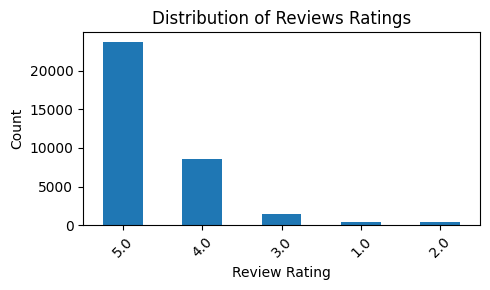

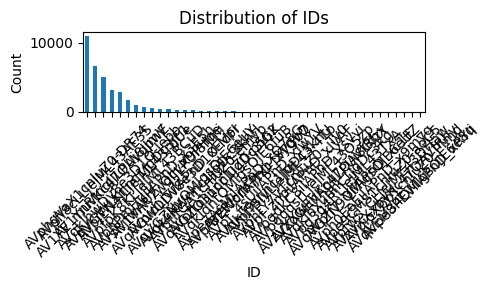

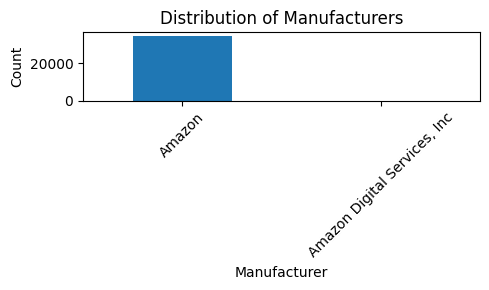

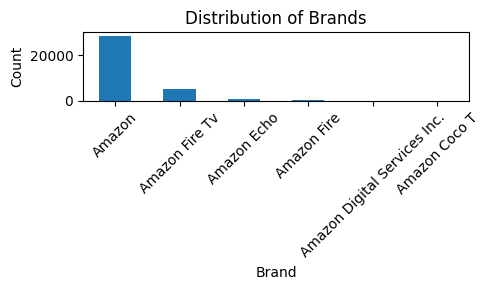

In [2]:
#Make plot that shows the distribution of the Primary Category, categories and brand
import matplotlib.pyplot as plt
"""
plt.figure(figsize=(5, 3))
df['categories'].value_counts().plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Primary Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
"""

#Make plot that shows the distribution of the reviews.rating
plt.figure(figsize=(5, 3))
df['reviews.rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Reviews Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Make plot that shows the distribution of the ID
plt.figure(figsize=(5, 3))
df['id'].value_counts().plot(kind='bar')
plt.title('Distribution of IDs')
plt.xlabel('ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Make plot that shows the distribution of the manufacturer nad manufacturernumber
plt.figure(figsize=(5, 3))
df['manufacturer'].value_counts().plot(kind='bar')
plt.title('Distribution of Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##Make plot that shows the distribution of the brand
plt.figure(figsize=(5, 3))
df['brand'].value_counts().plot(kind='bar')
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
review=pd.DataFrame(df.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,reviews.rating,No of Users
0,5.0,23775
1,4.0,8541
2,3.0,1499
3,1.0,410
4,2.0,402


In [4]:
# Clean columns review.userCity, review.userProvince
df = df.drop(columns=['reviews.userCity', 
        'reviews.userProvince',
        'reviews.id',
        'reviews.didPurchase',
        'reviews.sourceURLs',
        'reviews.dateSeen',
        'name',
        'keys',
        'reviews.dateAdded',
        'manufacturer',
        'reviews.date',
        'reviews.numHelpful',
        'asins',
        'categories',
        'reviews.sourceURLs',
        'brand',
        'manufacturer',
        'reviews.dateSeen',
        'id','reviews.doRecommend',
        'reviews.username'])
        #removing asins as it is redundant, manufactor are all the same, keys are not needed(bunch of numbers and letters), 
        # reviews.dateSeen is not needed as it is the same as reviews.date, reviews.dateAdded has nulls, 
        # reviews.userCity and reviews.userProvince are all nulls
df.info()
df.isnull().any()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34627 non-null  float64
 1   reviews.text    34659 non-null  object 
 2   reviews.title   34654 non-null  object 
dtypes: float64(1), object(2)
memory usage: 812.5+ KB


reviews.rating    True
reviews.text      True
reviews.title     True
dtype: bool

In [5]:
#Elimiate remaining nulls
df.dropna()
print(df.isnull().any())
print(df.info())

reviews.rating    True
reviews.text      True
reviews.title     True
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34627 non-null  float64
 1   reviews.text    34659 non-null  object 
 2   reviews.title   34654 non-null  object 
dtypes: float64(1), object(2)
memory usage: 812.5+ KB
None


In [6]:
df.head(5)

,reviews.rating,reviews.text,reviews.title
0,5.0,This product so far has not disappointed. My c...,Kindle
1,5.0,great for beginner or experienced person. Boug...,very fast
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


## Dataset is still very unbalanced, we need to balance it
1) We will add more data from other datasets and filter it to only include the reviews.rating 1 to 5. I dont need the 5 star reviews, since this is the most common rating, the one making the dataset unbalanced.
2) use undersampling to balance the dataset.


In [7]:
# 1) We will add more data from other datasets and filter it to only include the reviews.rating 1 to 3. I dont need the 5 star reviews, since this is the most common rating, the one making the dataset unbalanced.

data2=pd.read_csv('Amazon_dataset/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
data2=data2[data2['reviews.rating'] <= 3]
data2 = data2[['reviews.rating','reviews.text','reviews.title'] ]
data2=data2.dropna()
print(data2.shape)

data3=pd.read_csv('Amazon_dataset/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
data3=data3[data3['reviews.rating'] <= 3]
data3 = data3[['reviews.rating','reviews.text','reviews.title'] ]
data3=data3.dropna()
print(data3.shape)

# Now we will concatenate the dataframes
new_df = pd.concat([df, data2, data3], ignore_index=True)
new_df.dropna()
print(new_df.shape)


(314, 3)
(2787, 3)
(37761, 3)


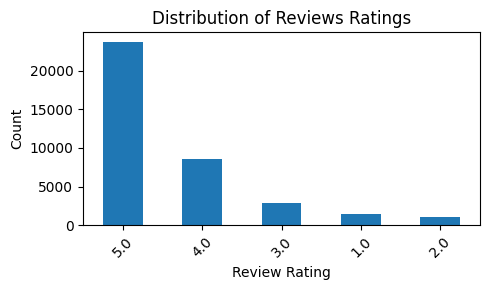

In [8]:
#Make plot that shows the distribution of the reviews.rating
plt.figure(figsize=(5, 3))
new_df['reviews.rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Reviews Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# First, clean the data by removing null values
new_df = new_df.dropna(subset=['reviews.rating', 'reviews.text','reviews.title'])

print(new_df.isnull().any())
print(new_df.info())



reviews.rating    False
reviews.text      False
reviews.title     False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
Index: 37721 entries, 0 to 37760
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  37721 non-null  float64
 1   reviews.text    37721 non-null  object 
 2   reviews.title   37721 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB
None


## Tokenize the text,remove stopwords and balance datasets with Oversampling


In [10]:
# Define the text processing function
import string
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# 2. Text Processing
def preprocess_text(text):
    # Handle non-string inputs
    if not isinstance(text, str):
        if pd.isna(text):  # Handle NaN values
            return ""
        text = str(text)  # Convert numbers or other types to string
    
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]
    # Join back to string
    return ' '.join(tokens)





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edwar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
# 1. Create sentiment labels based on ratings
def create_sentiment_labels(rating):
    if rating <= 2:  # 1-2 stars
        return 0  # Negative
    elif rating == 3:  # 3 stars
        return 1  # Neutral 
    else:  # 4-5 stars
        return 2  # Positive

# Add sentiment column
new_df['sentiment'] = new_df['reviews.rating'].apply(create_sentiment_labels)

# Print initial class distribution
print("Initial class distribution:")
print(new_df['sentiment'].value_counts())



Initial class distribution:
sentiment
2    32309
1     2902
0     2510
Name: count, dtype: int64


In [12]:
new_df.head(5)

,reviews.rating,reviews.text,reviews.title,sentiment
0,5.0,This product so far has not disappointed. My c...,Kindle,2
1,5.0,great for beginner or experienced person. Boug...,very fast,2
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,2
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,2
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,2


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Clean and preprocess all data first
print("Preprocessing text data...")
X = new_df['reviews.text'].fillna("")  # Fill NaN with empty string
X = X.apply(preprocess_text)
y = new_df['sentiment']

# 2. Vectorize all data
print("Vectorizing text data...")
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)


Preprocessing text data...
Vectorizing text data...


Balancing dataset with SMOTE...

Balanced class distribution:
sentiment
2    32309
0    32309
1    32309
Name: count, dtype: int64
Splitting into train/test sets...


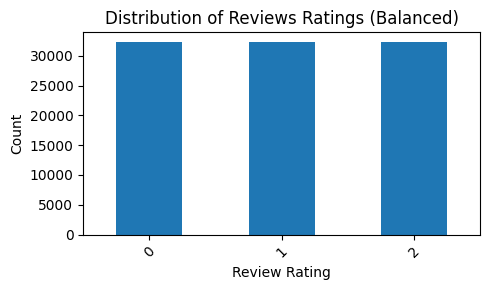

In [14]:
# 3. Balance all data using SMOTE
print("Balancing dataset with SMOTE...")
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_vec, y)

# Print balanced class distribution
print("\nBalanced class distribution:")
print(pd.Series(y_balanced).value_counts())

# 4. Now split the balanced data into train and test sets
print("Splitting into train/test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# Plot balanced distribution
plt.figure(figsize=(5, 3))
pd.Series(y_balanced).value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Reviews Ratings (Balanced)')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Train LSTM Model

In [15]:
import tensorflow as tf
# Reshape for LSTM
# Convert sparse matrix to dense and reshape
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Calculate input dimensions
n_features = X_train_dense.shape[1]
timesteps = 1  # Since we're dealing with non-sequential text data
input_dim = n_features

# Reshape input data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train_dense.reshape(-1, timesteps, input_dim)
X_test_reshaped = X_test_dense.reshape(-1, timesteps, input_dim)

# Create LSTM Model
model = Sequential([
    LSTM(64, input_shape=(timesteps, input_dim), return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: negative, neutral, positive
])
"""
# Compile model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
"""

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Add early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Get predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print overall accuracy
accuracy = np.mean(y_pred_classes == y_test)
print(f"\nOverall Accuracy: {accuracy:.2%}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive']))

Epoch 1/20
970/970 [==============================] - 6s 4ms/step - loss: 0.6012 - accuracy: 0.7595 - val_loss: 0.3576 - val_accuracy: 0.8669
Epoch 2/20
970/970 [==============================] - 3s 3ms/step - loss: 0.3700 - accuracy: 0.8706 - val_loss: 0.2898 - val_accuracy: 0.9075
Epoch 3/20
970/970 [==============================] - 3s 3ms/step - loss: 0.3013 - accuracy: 0.8980 - val_loss: 0.2570 - val_accuracy: 0.9125
Epoch 4/20
970/970 [==============================] - 3s 3ms/step - loss: 0.2622 - accuracy: 0.9102 - val_loss: 0.2421 - val_accuracy: 0.9217
Epoch 5/20
970/970 [==============================] - 3s 3ms/step - loss: 0.2330 - accuracy: 0.9192 - val_loss: 0.2284 - val_accuracy: 0.9222
Epoch 6/20
970/970 [==============================] - 3s 3ms/step - loss: 0.2100 - accuracy: 0.9257 - val_loss: 0.2251 - val_accuracy: 0.9252
Epoch 7/20
970/970 [==============================] - 3s 3ms/step - loss: 0.1989 - accuracy: 0.9286 - val_loss: 0.2208 - val_accuracy: 0.9262
Epoch 

## Evaluation

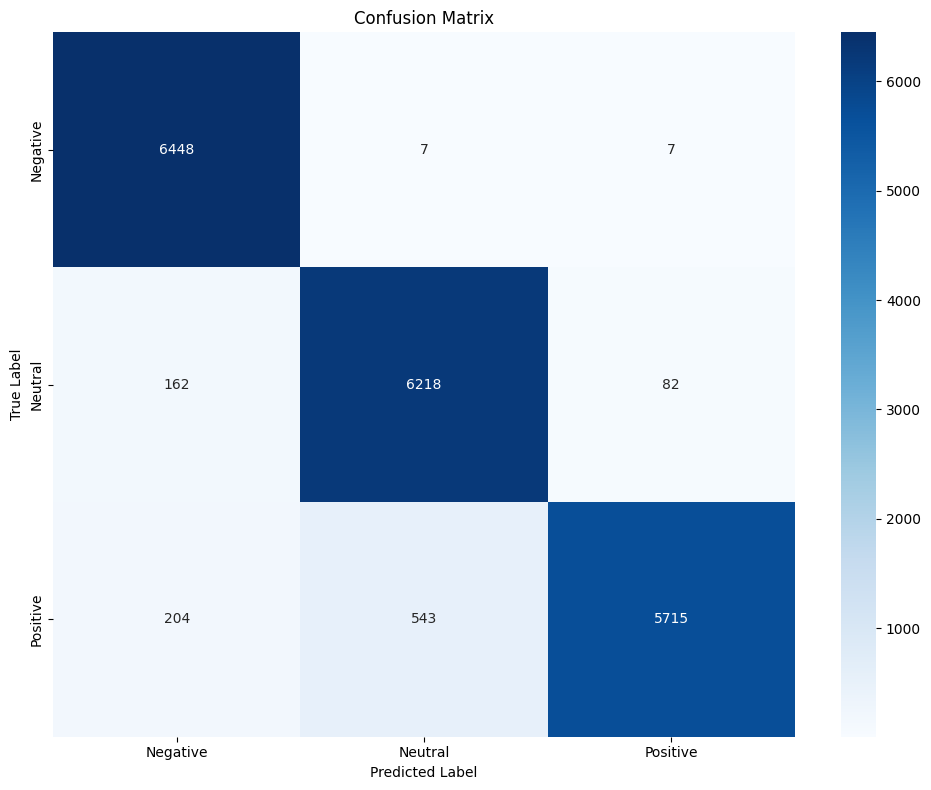

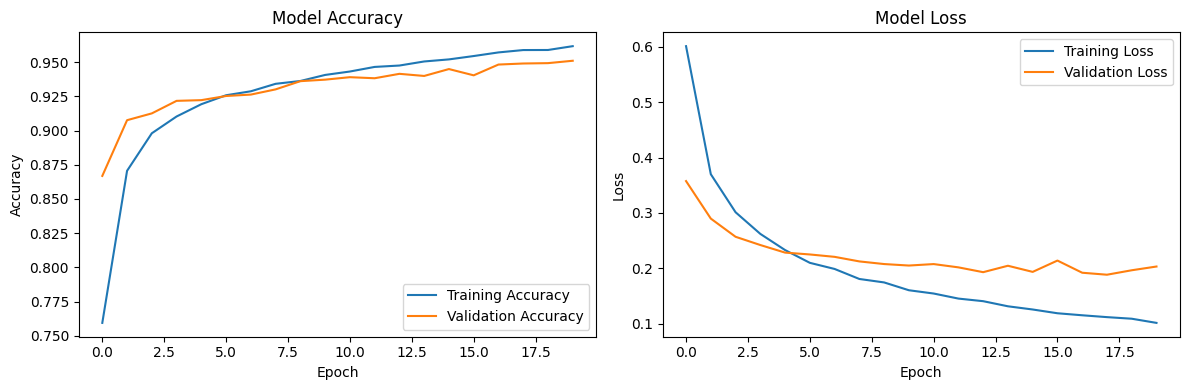


Per-class Accuracies:
Negative: 99.78%
Neutral: 96.22%
Positive: 88.44%


In [16]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Calculate per-class accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)
print("\nPer-class Accuracies:")
for i, acc in enumerate(['Negative', 'Neutral', 'Positive']):
    print(f"{acc}: {class_accuracies[i]:.2%}")